<a href="https://colab.research.google.com/github/Dheeraj30198/speech-emotion-recognition/blob/main/DNAproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa


In [ ]:
!pip install numpy


In [ ]:
!pip install pandas



In [ ]:
!pip install tensorflow


In [ ]:
!pip install scikit-learn


In [ ]:
!pip install matplotlib seaborn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_path = '/content/drive/My Drive/RAVDESS_kaggle/RAVDESS_DATASET.zip'
extract_path = '/content/RAVDESS'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import os

# List folders and files inside /content/RAVDESS
print("Contents of /content/RAVDESS:")
print(os.listdir('/content/RAVDESS'))


Contents of /content/RAVDESS:
['Actor_08', 'Actor_07', 'Actor_24', 'Actor_20', 'Actor_19', 'Actor_03', 'Actor_18', 'Actor_16', 'Actor_09', 'Actor_15', 'Actor_11', 'Actor_21', 'Actor_01', 'Actor_05', 'Actor_14', 'Actor_23', 'Actor_04', 'audio_speech_actors_01-24', 'Actor_22', 'Actor_06', 'Actor_10', 'Actor_13', 'Actor_02', 'Actor_12', 'Actor_17']


In [ ]:
import glob

# Recursively find all .wav files inside RAVDESS
wav_files = glob.glob('/content/RAVDESS/**/*.wav', recursive=True)

# Show first 10 files
print("First 10 .wav files:")
for file in wav_files[:10]:
    print(file)

First 10 .wav files:
/content/RAVDESS/Actor_08/03-01-05-01-02-01-08.wav
/content/RAVDESS/Actor_08/03-01-02-01-01-02-08.wav
/content/RAVDESS/Actor_08/03-01-02-01-02-02-08.wav
/content/RAVDESS/Actor_08/03-01-01-01-01-01-08.wav
/content/RAVDESS/Actor_08/03-01-01-01-02-02-08.wav
/content/RAVDESS/Actor_08/03-01-03-01-02-02-08.wav
/content/RAVDESS/Actor_08/03-01-04-02-02-02-08.wav
/content/RAVDESS/Actor_08/03-01-04-02-01-01-08.wav
/content/RAVDESS/Actor_08/03-01-08-01-02-01-08.wav
/content/RAVDESS/Actor_08/03-01-03-01-01-01-08.wav


In [ ]:
!pip install librosa

In [ ]:
import librosa
import numpy as np

In [ ]:
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

In [ ]:
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled

In [ ]:
!pip install resampy

In [ ]:
!pip install librosa --upgrade
!pip install resampy

In [ ]:
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

In [ ]:
X = []
y = []

for file in wav_files:
    try:
        emotion_id = file.split("/")[-1].split("-")[2]
        emotion = emotion_map.get(emotion_id)
        features = extract_features(file)
        X.append(features)
        y.append(emotion)
    except Exception as e:
        print(f"Error processing {file}: {e}")

In [ ]:
import os

# Recursively collect all .wav files
wav_files = []
for root, dirs, files in os.walk("/content/RAVDESS"):
    for file in files:
        if file.endswith(".wav"):
            wav_files.append(os.path.join(root, file))

print(f"Total .wav files found: {len(wav_files)}")

Total .wav files found: 2880


In [ ]:
print(f"Total samples: {len(X)}")
print(f"Feature shape: {X[0].shape}")
print(f"First 5 labels: {y[:5]}")

Total samples: 2880
Feature shape: (40,)
First 5 labels: ['angry', 'calm', 'calm', 'neutral', 'neutral']


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Optional: see label mapping
emotion_classes = list(label_encoder.classes_)
print("Emotion classes:", emotion_classes)
print("Encoded labels (first 5):", y_encoded[:5])

Emotion classes: [np.str_('angry'), np.str_('calm'), np.str_('disgust'), np.str_('fearful'), np.str_('happy'), np.str_('neutral'), np.str_('sad'), np.str_('surprised')]
Encoded labels (first 5): [0 1 1 5 5]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    np.array(X), y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 2304
Testing samples: 576


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(40, 1)),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(8, activation='softmax')  # 8 emotion classes
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 40, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,648 (471.28 KB)

 Trainable params: 120,648 (471.28 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train = X_train.reshape(-1, 40, 1)
X_test = X_test.reshape(-1, 40, 1)

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.1770 - loss: 2.0532 - val_accuracy: 0.2604 - val_loss: 1.8756
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.2509 - loss: 1.9166 - val_accuracy: 0.2934 - val_loss: 1.7983
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.3110 - loss: 1.8265 - val_accuracy: 0.2760 - val_loss: 1.8232
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.2852 - loss: 1.8302 - val_accuracy: 0.3420 - val_loss: 1.7292
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.3130 - loss: 1.7782 - val_accuracy: 0.3455 - val_loss: 1.7220
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.3026 - loss: 1.7748 - val_accuracy: 0.3455 - val_loss: 1.6920
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.3245 - loss: 1.7380 - val_accuracy: 0.3351 - val_loss: 1.6923
Epoch 8/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.3084 - loss: 1.7324 - val_accuracy: 0

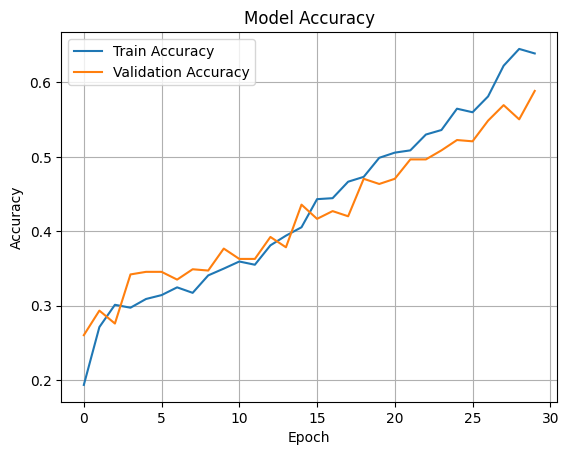

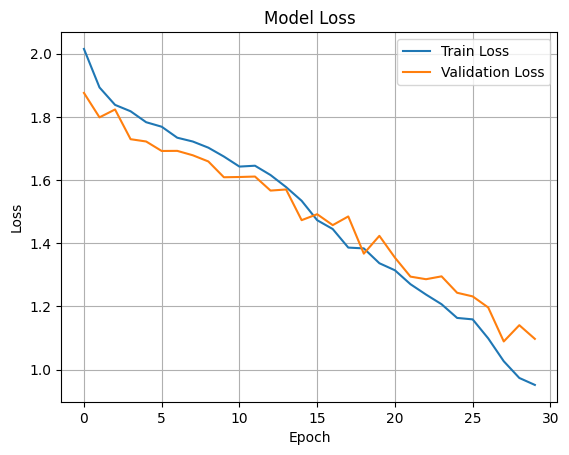

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


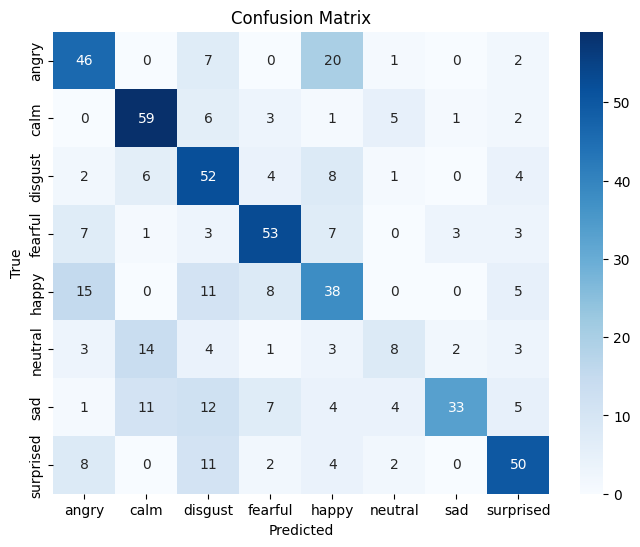

              precision    recall  f1-score   support

       angry       0.56      0.61      0.58        76
        calm       0.65      0.77      0.70        77
     disgust       0.49      0.68      0.57        77
     fearful       0.68      0.69      0.68        77
       happy       0.45      0.49      0.47        77
     neutral       0.38      0.21      0.27        38
         sad       0.85      0.43      0.57        77
   surprised       0.68      0.65      0.66        77

    accuracy                           0.59       576
   macro avg       0.59      0.56      0.56       576
weighted avg       0.61      0.59      0.58       576



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_classes, yticklabels=emotion_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_classes, target_names=emotion_classes))

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

model.fit(X_train, y_train, epochs=30, batch_size=32,
          validation_data=(X_test, y_test),
          class_weight=class_weights_dict)

Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.6549 - loss: 0.9406 - val_accuracy: 0.5938 - val_loss: 1.0580
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.6383 - loss: 0.9752 - val_accuracy: 0.5938 - val_loss: 1.0524
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.6674 - loss: 0.9147 - val_accuracy: 0.5903 - val_loss: 1.0511
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.7015 - loss: 0.8455 - val_accuracy: 0.5955 - val_loss: 0.9861
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.7259 - loss: 0.7550 - val_accuracy: 0.6233 - val_loss: 1.0171
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7355 - loss: 0.7342 - val_accuracy: 0.6389 - val_loss: 0.9531
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.7572 - loss: 0.6637 - val_accuracy: 0.6528 - val_loss: 0.9401
Epoch 8/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.7558 - loss: 0.6739 - val_accuracy: 0.65

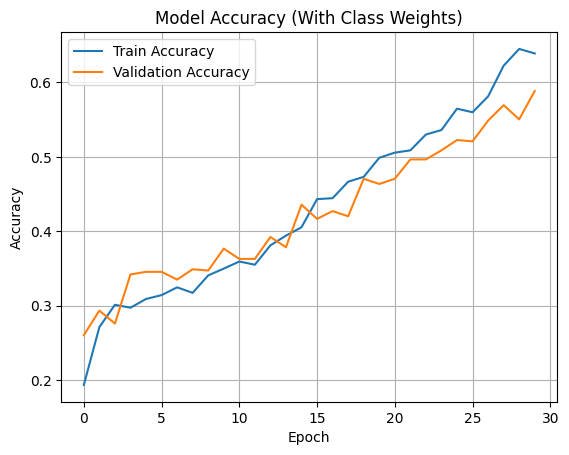

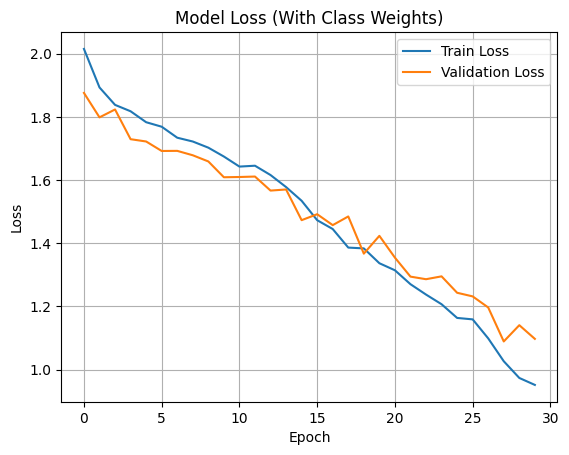

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (With Class Weights)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (With Class Weights)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


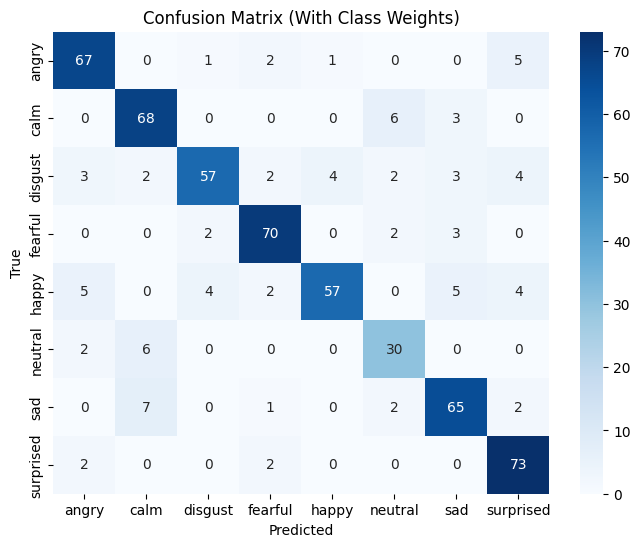

              precision    recall  f1-score   support

       angry       0.85      0.88      0.86        76
        calm       0.82      0.88      0.85        77
     disgust       0.89      0.74      0.81        77
     fearful       0.89      0.91      0.90        77
       happy       0.92      0.74      0.82        77
     neutral       0.71      0.79      0.75        38
         sad       0.82      0.84      0.83        77
   surprised       0.83      0.95      0.88        77

    accuracy                           0.85       576
   macro avg       0.84      0.84      0.84       576
weighted avg       0.85      0.85      0.84       576



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_classes, yticklabels=emotion_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (With Class Weights)')
plt.show()

print(classification_report(y_test, y_pred_classes, target_names=emotion_classes))